In [ ]:
! pip install -r /content/drive/MyDrive/Colab-Notebooks/grad-ass/requirements.txt

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab-Notebooks/grad-ass')

from common import common, BBoxVisualizer

import os

import json
import numpy as np
import pandas as pd

import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [ ]:
DATA_SRC = common['DATA_SRC']

In [ ]:
os.chdir(DATA_SRC)
os.listdir()

['images',
 'train_traffic_sign_dataset.json',
 'annotation.csv',
 'dataset_erd.png',
 'sample_images',
 'images.csv',
 'annotations.csv',
 'categories.csv',
 'classes.names',
 'classes.data',
 'images_train.csv',
 'images_valid.csv',
 'valid.txt',
 'aug_images.csv',
 'aug_annotations.csv',
 'train.txt']

### ```train_traffic_sign_dataset.json``` is the whole dataset with ```4``` tables

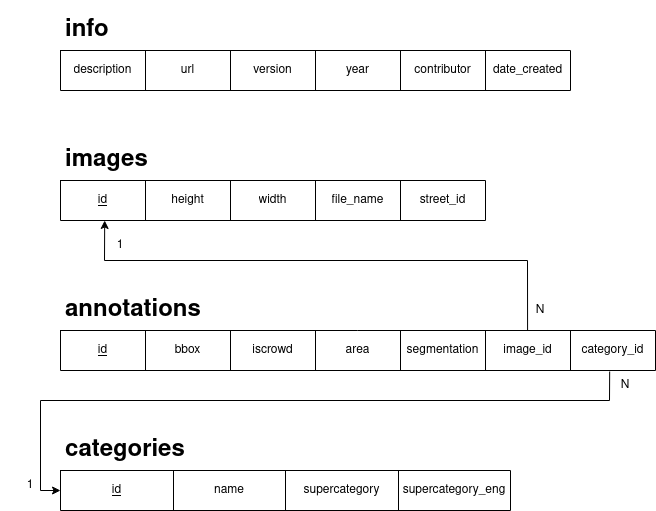

1 image can have many annotations (bbox). 1 category can have many annotations.

In [ ]:
with open(os.path.join(DATA_SRC, 'train_traffic_sign_dataset.json')) as data:
    train_data = json.loads(data.read())

print("info: {}".format(train_data['info'].keys()))
print("annotations: {}".format(train_data['annotations'][0].keys()))
print("categories: {}".format(train_data['categories'][0].keys()))
print("images: {}".format(train_data['images'][0].keys()))

info: dict_keys(['description', 'url', 'version', 'year', 'contributor', 'date_created'])
annotations: dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])
categories: dict_keys(['supercategory', 'supercategory_eng', 'id', 'name'])
images: dict_keys(['file_name', 'height', 'width', 'id', 'street_id'])


In [ ]:
images = pd.DataFrame.from_dict(train_data['images'])
display(images)
display(images.info())
images.to_csv(os.path.join(DATA_SRC, 'images.csv'), index=False)

file_name  height  width     id  street_id
0         3.png     626   1622      3          3
1         5.png     626   1622      5          4
2         6.png     626   1622      6          5
3        16.png     626   1622     16          3
4        17.png     626   1622     17          8
...         ...     ...    ...    ...        ...
4495  12503.png     626   1622  12503         49
4496  12509.png     626   1622  12509         45
4497  12519.png     626   1622  12519         45
4498  12521.png     626   1622  12521         49
4499  12523.png     626   1622  12523         53

[4500 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  4500 non-null   object
 1   height     4500 non-null   int64 
 2   width      4500 non-null   int64 
 3   id         4500 non-null   int64 
 4   street_id  4500 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 175.9+ KB


None

In [ ]:
annotations = pd.DataFrame.from_dict(train_data['annotations'])
display(annotations)
display(annotations.info())
annotations.to_csv(os.path.join(DATA_SRC, 'annotations.csv'), index=False)

segmentation   area  iscrowd  ...                  bbox category_id     id
0               []    342        0  ...    [880, 333, 19, 18]           2      0
1               []   6889        0  ...   [1069, 355, 83, 83]           3      1
2               []     63        0  ...      [768, 480, 9, 7]           2      2
3               []    255        0  ...    [781, 337, 17, 15]           6      3
4               []     56        0  ...      [733, 352, 7, 8]           2      4
...            ...    ...      ...  ...                   ...         ...    ...
10995           []  27300        0  ...  [902, 290, 273, 100]           7  10996
10996           []   1968        0  ...   [1338, 173, 48, 41]           2  10997
10997           []    420        0  ...    [800, 256, 20, 21]           2  10998
10998           []    336        0  ...    [800, 281, 21, 16]           6  10999
10999           []    240        0  ...    [969, 335, 15, 16]           4  11000

[11000 rows x 7 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   segmentation  11000 non-null  object
 1   area          11000 non-null  int64 
 2   iscrowd       11000 non-null  int64 
 3   image_id      11000 non-null  int64 
 4   bbox          11000 non-null  object
 5   category_id   11000 non-null  int64 
 6   id            11000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 601.7+ KB


None

There are 11000 bboxes


In [ ]:
categories = pd.DataFrame.from_dict(train_data['categories'])
display(categories)
display(categories.info())
categories.to_csv(os.path.join(DATA_SRC, 'categories.csv'), index=False)

supercategory        supercategory_eng  id             name
0  Cấm ngược chiều                 No entry   1  Cấm ngược chiều
1   Cấm dừng và đỗ  No stopping and parking   2   Cấm dừng và đỗ
2           Cấm rẽ               No turning   3           Cấm rẽ
3  Giới hạn tốc độ              Speed limit   4  Giới hạn tốc độ
4      Cấm còn lại                No others   5      Cấm còn lại
5        Nguy hiểm                   Danger   6        Nguy hiểm
6        Hiệu lệnh                Mandatory   7        Hiệu lệnh

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   supercategory      7 non-null      object
 1   supercategory_eng  7 non-null      object
 2   id                 7 non-null      int64 
 3   name               7 non-null      object
dtypes: int64(1), object(3)
memory usage: 352.0+ bytes


None

In [ ]:
pd.merge(
    pd.merge(
        pd.DataFrame.from_dict(train_data['images']),
        pd.DataFrame.from_dict(train_data['annotations']),
        left_on=['id'], right_on=['image_id']
    ),
    pd.DataFrame.from_dict(train_data['categories']),
    left_on=['category_id'], right_on=['id']
)[['image_id', 'file_name', 'height', 'width', 'id_y', 'bbox', 'category_id', 'supercategory', 'supercategory_eng']].rename(
    {'id_y':'bbox_id'}, 
    axis='columns'
).to_csv(os.path.join(DATA_SRC, 'annotation.csv'), index=False)

In [ ]:
images = pd.read_csv(os.path.join(DATA_SRC, 'images.csv'))
annotations = pd.read_csv(os.path.join(DATA_SRC, 'annotations.csv'))
categories = pd.read_csv(os.path.join(DATA_SRC, 'categories.csv'))

In [ ]:
print("classes: \n{}\n".format(categories['supercategory'].unique()))
print("len = {}\n".format(categories['supercategory'].unique().shape[0]))
print("n_bboxes per class: \n{}\n".format(pd.merge(annotations, categories, left_on=['category_id'], right_on=['id'])['supercategory'].value_counts()))

classes: 
['Cấm ngược chiều' 'Cấm dừng và đỗ' 'Cấm rẽ' 'Giới hạn tốc độ'
 'Cấm còn lại' 'Nguy hiểm' 'Hiệu lệnh']

len = 7

n_bboxes per class: 
Nguy hiểm          3049
Cấm dừng và đỗ     2221
Cấm còn lại        1787
Cấm ngược chiều    1416
Hiệu lệnh          1022
Giới hạn tốc độ     949
Cấm rẽ              556
Name: supercategory, dtype: int64



In [ ]:
def pie_chart(feature, chart_title, data):
    data[feature].value_counts().plot.pie(
            title = chart_title, 
            autopct=lambda p: "{:.2f}%".format(p)
    )

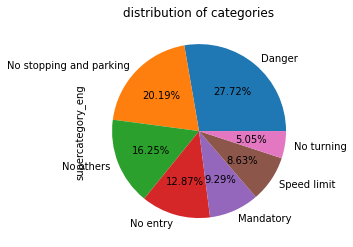

In [ ]:
pie_chart('supercategory_eng', 'distribution of categories', pd.merge(annotations, categories, left_on=['category_id'], right_on=['id']))

1 image can have many bboxes

In [ ]:
annotations[annotations['image_id'] == images[images['file_name'] == '12328.png']['id'].values[0]]

segmentation  area  iscrowd  ...                 bbox category_id     id
10854           []   810        0  ...    [66, 295, 30, 27]           2  10855
10855           []   810        0  ...    [65, 324, 30, 27]           4  10856
10856           []   651        0  ...    [65, 354, 31, 21]           6  10857
10857           []   864        0  ...   [323, 329, 32, 27]           1  10858
10858           []   840        0  ...   [321, 357, 30, 28]           7  10859
10859           []   400        0  ...   [661, 277, 20, 20]           4  10860
10860           []   420        0  ...   [686, 277, 21, 20]           4  10861
10861           []   420        0  ...   [712, 275, 20, 21]           4  10862
10862           []   361        0  ...   [974, 356, 19, 19]           4  10863
10863           []   361        0  ...   [972, 334, 19, 19]           2  10864
10864           []   475        0  ...  [1154, 350, 19, 25]           6  10865

[11 rows x 7 columns]

### number of bboxes per image spectrum

In [ ]:
bboxes_count_image_list = [
    annotations[annotations['image_id'] == image['id']].shape[0] for _, image in images.iterrows()
]

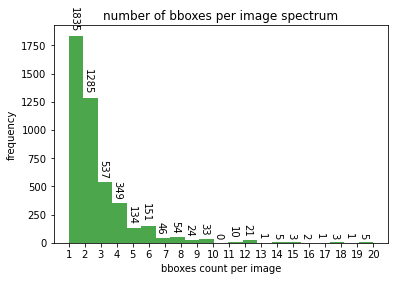

In [ ]:
%matplotlib inline

arr = plt.hist(
    bboxes_count_image_list,
    bins= int(max(bboxes_count_image_list) + 1),
    color ='green',
    alpha = 0.7
)

for i in range(int(max(bboxes_count_image_list) + 1)):
    plt.text(arr[1][i], arr[0][i] + 50, str(int(arr[0][i])), rotation=-90)

plt.xticks(np.arange(min(bboxes_count_image_list), max(bboxes_count_image_list) + 1, 1.0))

plt.xlabel('bboxes count per image')
plt.ylabel('frequency')
plt.title('number of bboxes per image spectrum')
  
plt.show()

In [ ]:
print("average bboxes per images = {}".format(np.mean(bboxes_count_image_list)))

average bboxes per images = 2.4444444444444446


### plot some random images with bbox and save them to storage

In [ ]:
bbox_visualizer = BBoxVisualizer(
    box_color=(100, 255, 0),
    text_color=(0, 0, 0)
)

In [ ]:
N_IMGS = 20

images_samples = images.sample(n=N_IMGS, replace=False)
for _, image in images_samples.iterrows():
    annotation_samples = annotations[annotations['image_id'] == image['id']]
    img = cv2.imread(os.path.join(DATA_SRC, 'images', image['file_name']))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bbox_img = bbox_visualizer.visualize(
        img,
        [bbox for bbox in annotation_samples['bbox'].values],
        [categories[categories['id'] == label_id]['supercategory'].values[0] for label_id in annotation_samples['category_id'].values],
        image['file_name'],
        'coco',
        'pil'
    )
    cv2.imwrite(os.path.join(DATA_SRC, 'sample_images', image['file_name']), cv2.cvtColor(bbox_img, cv2.COLOR_RGB2BGR))

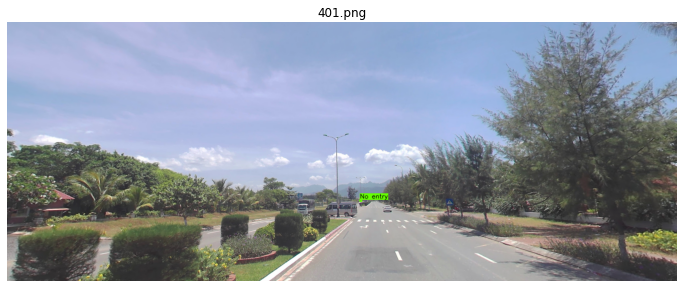

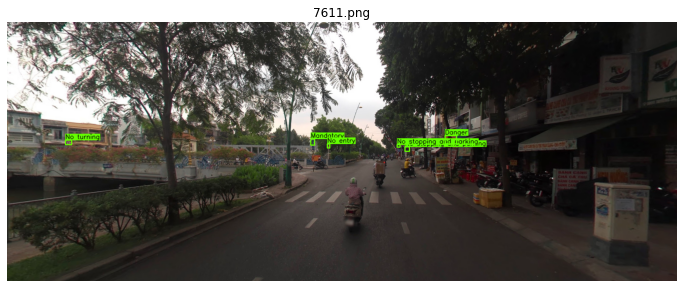

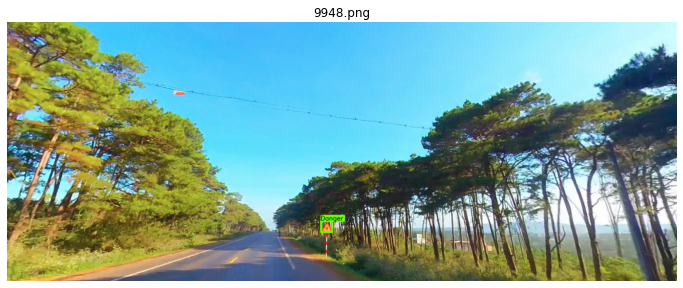

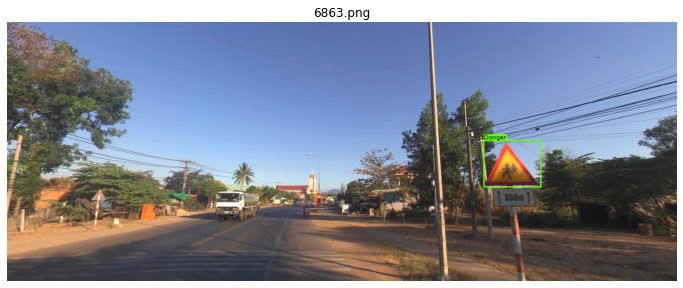

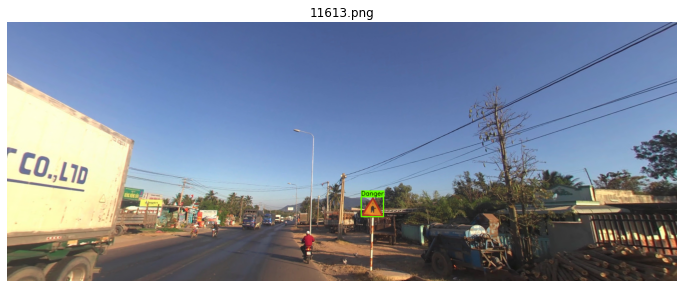

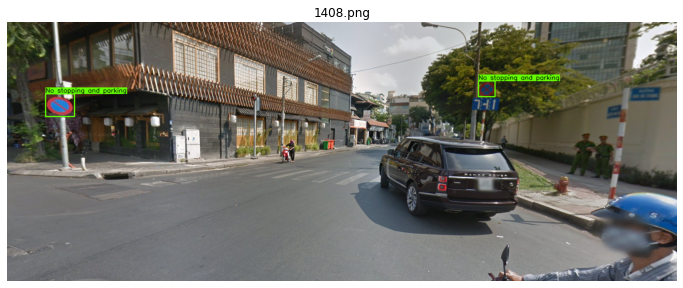

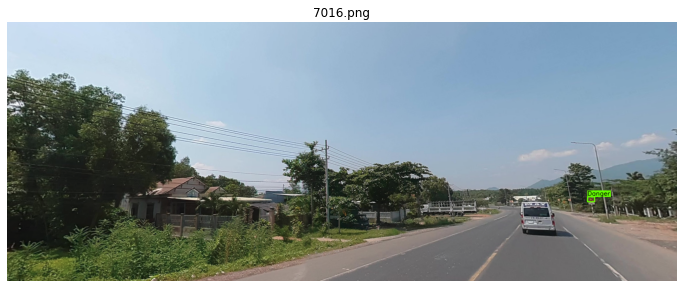

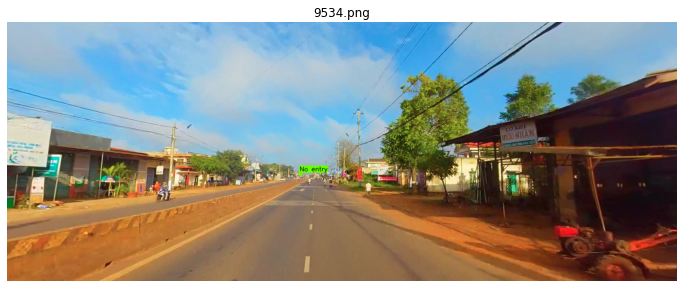

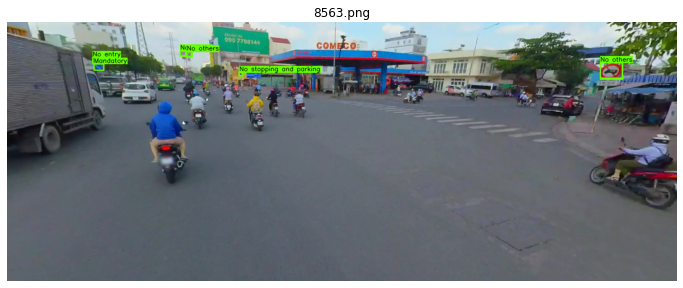

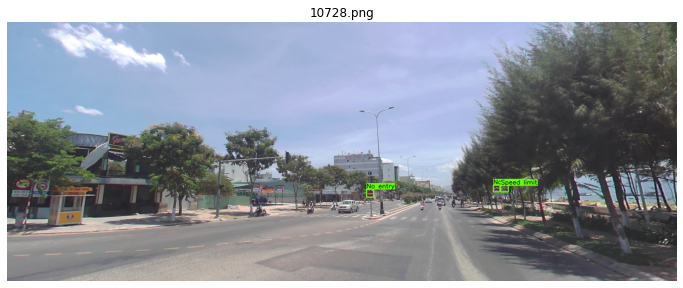

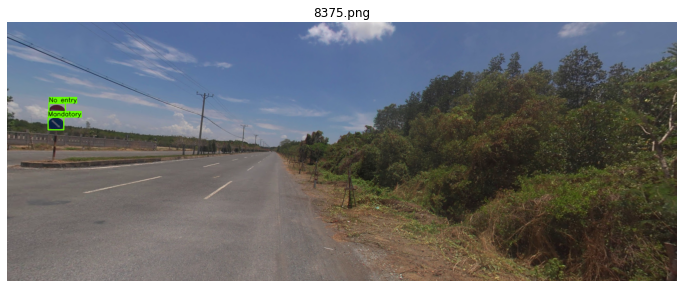

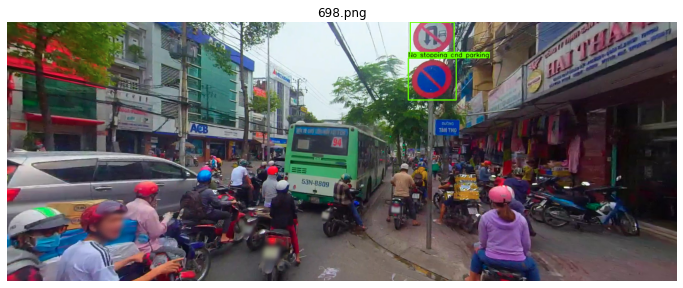

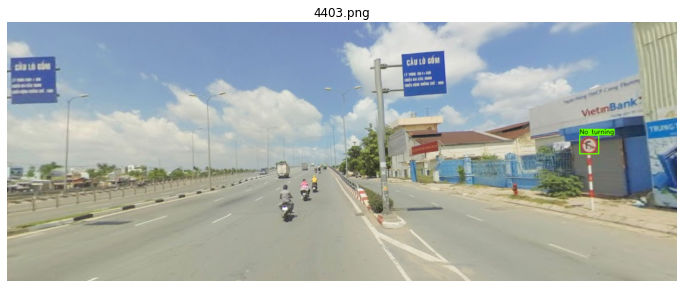

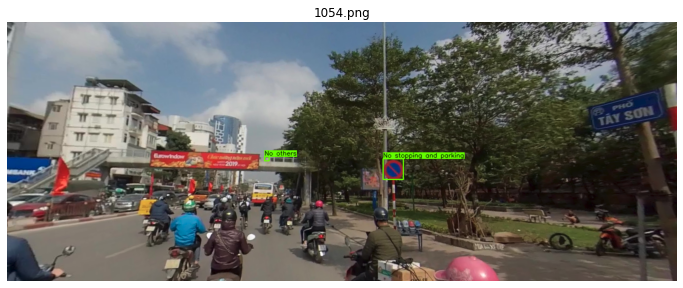

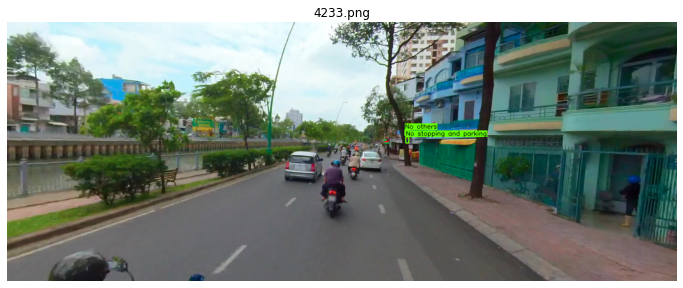

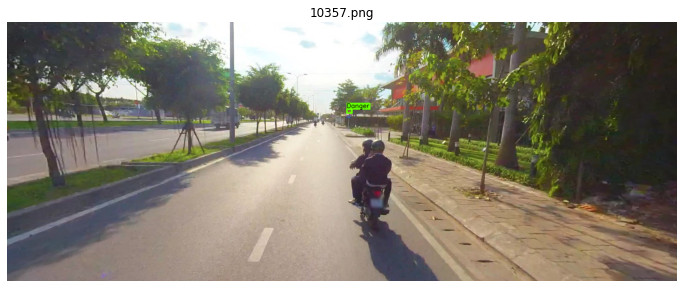

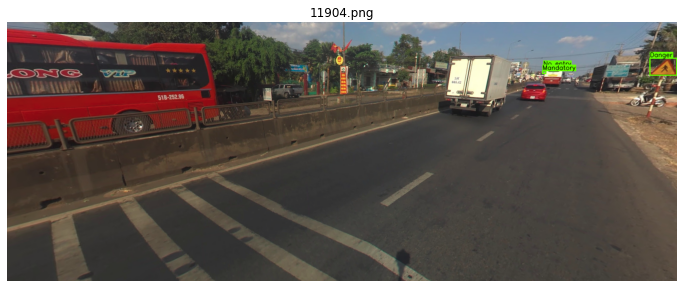

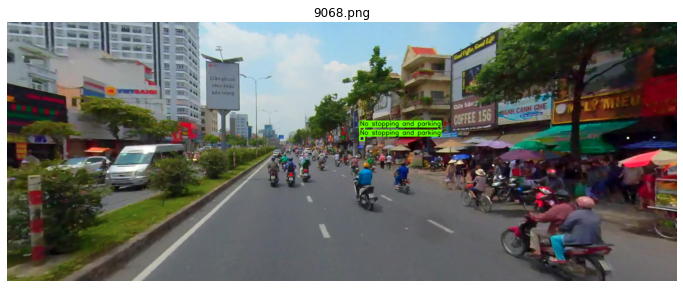

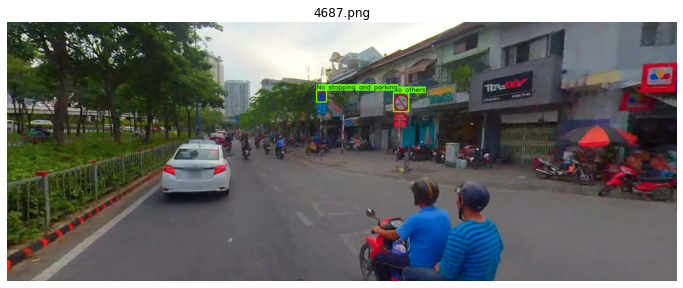

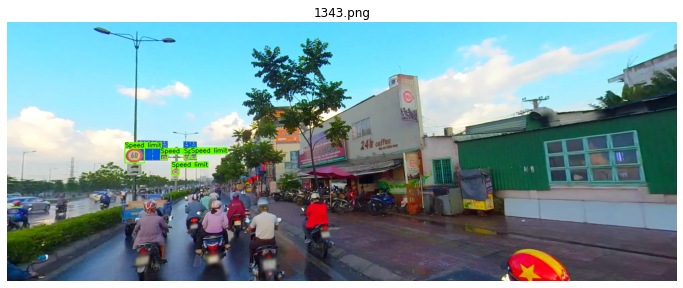

In [ ]:
N_IMGS = 20

images_samples = images.sample(n=N_IMGS, replace=False)
for _, image in images_samples.iterrows():
    annotation_samples = annotations[annotations['image_id'] == image['id']]
    img = cv2.imread(os.path.join(DATA_SRC, 'images', image['file_name']))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bbox_img = bbox_visualizer.visualize(
        img,
        [json.loads(bbox) for bbox in annotation_samples['bbox'].values],
        [categories[categories['id'] == label_id]['supercategory_eng'].values[0] for label_id in annotation_samples['category_id'].values],
        image['file_name'],
        'coco',
        'cv2'
    )
    cv2.imwrite(os.path.join(DATA_SRC, 'sample_images', image['file_name']), cv2.cvtColor(bbox_img, cv2.COLOR_RGB2BGR))